# Reconhecimento de Movimentos Utilizando uma Rede *Long Short-Term Memory* (LSTM)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical, split_dataset
import pandas as pd

## Listagem das *features* a partir do ficheiro

In [2]:
labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", sep="\s+", header=None)

labels

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


## Carregamento e Tratamento dos *Datasets*

In [3]:
# Carregar os datasets
import numpy as np

X_treino = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None)
y_treino = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", sep="\s+", header=None)

X_teste_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None)
y_teste_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", sep="\s+", header=None)

X_teste = X_teste_val[0:round(0.9*X_teste_val.shape[0])]
X_val = X_teste_val[round(0.9*X_teste_val.shape[0]):]

y_teste = y_teste_val[0:round(0.9*y_teste_val.shape[0])]
y_val = y_teste_val[round(0.9*y_teste_val.shape[0]):]

# Preparar os dados para entrada na rede LSTM
X_treino = X_treino.values.reshape((X_treino.shape[0], 1, X_treino.shape[1]))
X_teste = X_teste.values.reshape((X_teste.shape[0], 1, X_teste.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)
y_val = to_categorical(y_val)

X_treino.shape[1], X_treino.shape[2]

(1, 561)

## Criação do Modelo da Rede Neuronal

In [4]:
import keras
from keras.optimizers import *
from keras.layers import *

# Definir a arquitetura da rede LSTM
modelo = Sequential()
modelo.add(Input([X_treino.shape[1], X_treino.shape[2]]))
modelo.add(LSTM(117))
modelo.add(Dense(269, activation="relu"))
modelo.add(Dense(7, activation="softmax"))

# Compilar o modelo
modelo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy', 'precision', 'recall', 'f1_score'])

## Treino da Rede Neuronal

In [5]:
# Treinar o modelo
historico = modelo.fit(X_treino, y_treino_cat, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5967 - f1_score: 0.4871 - loss: 0.3332 - precision: 0.7119 - recall: 0.2253 - val_accuracy: 0.9288 - val_f1_score: 0.7850 - val_loss: 0.0976 - val_precision: 0.9315 - val_recall: 0.9220
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9136 - f1_score: 0.7826 - loss: 0.0874 - precision: 0.9180 - recall: 0.9068 - val_accuracy: 0.9695 - val_f1_score: 0.8317 - val_loss: 0.0508 - val_precision: 0.9695 - val_recall: 0.9695
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9393 - f1_score: 0.8065 - loss: 0.0527 - precision: 0.9396 - recall: 0.9382 - val_accuracy: 0.9966 - val_f1_score: 0.8531 - val_loss: 0.0229 - val_precision: 0.9966 - val_recall: 0.9966
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9471 - f1_score: 0.8141 - loss: 0.0401 - precision: 0.9482 - recall: 0.9467 - val_accuracy: 0.9898 - val_f1_score: 0.8465 - val_loss: 0.0173 - val_precision: 0.9898 - val_recall:

## Avaliação da Precisão da Rede LSTM

In [6]:
# Avaliar a precisão do modelo
_, precisao, precision, recall, f1_score = modelo.evaluate(X_teste, y_teste_cat)

print(f"Precisão do Modelo: {precisao*100} %")
print(f"Precision do Modelo: {precision*100} %")
print(f"Recall do Modelo: {recall*100} %")
print(f"F1-Score do Modelo: {f1_score[-1]*100} %")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9383 - f1_score: 0.7891 - loss: 0.0560 - precision: 0.9383 - recall: 0.9379
Precisão do Modelo: 94.34388875961304 %
Precision do Modelo: 94.33962106704712 %
Recall do Modelo: 94.26847696304321 %
F1-Score do Modelo: 100.0 %


## Evolução da Precisão ao Longo do Treino

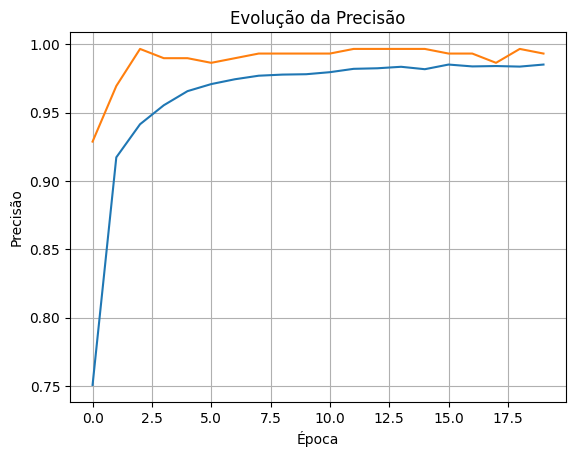

In [7]:
import matplotlib.pyplot as plt

precisao = historico.history['accuracy']
validacao = historico.history['val_accuracy']

plt.plot(precisao)
plt.plot(validacao)
plt.title('Evolução da Precisão')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.grid()

## Matriz de Confusão

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


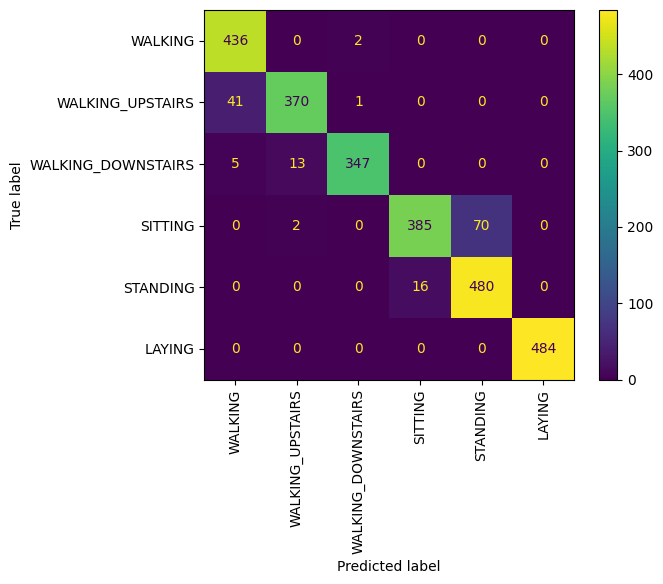

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Saídas previstas
y_previsto = modelo.predict(X_teste)
y_previsto = [np.argmax(y) for y in y_previsto]

# Saídas reais
y_real = [np.argmax(y) for y in y_teste_cat]

# Criação da matriz de confusão
cm = confusion_matrix(y_real, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation=90)